# In questo script recupero informazioni relative alla deltaCALHI in elettroni dei FE RD53A e RD53B e plotto in funzione di ILDAC


In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [2]:
%run ./Functions/selectFiles.ipynb #gestisce button e schermata di dialogo con il file system
%run ./Functions/parseCalibs.ipynb #parsing dei file txt. input: path[]; output: dataframe[]

In [3]:
button = selectFiles() #è possibile selezionare più files

Selected files:
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/New folder/calib_I_LDAC_8_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/New folder/calib_I_LDAC_10_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/New folder/calib_I_LDAC_12_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/New folder/calib_I_LDAC_13_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/New folder/calib_I_LDAC_14_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/New folder/calib_I_LDAC_16_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/New folder/calib_I_LDAC_18_0_soglia_1000_elettroni.txt
C:/Users/andre/Documents/CMSAFE/CMSAFE_calibs/New folder/calib_I_LDAC_20_0_soglia_1000_elettroni.txt


In [5]:
data = parseCalibs(button.files) #estrapolo i dati dei file di configurazione

8 dataframe crated!


In [6]:
correnti = [8.0, 10.0, 12.0, 13.0, 14.0, 16.0, 18.0, 20.0] #vettore delle correnti ILDAC usate per i test

### Filtra i dati per ricavare i deltaCALHI
La funzione recupera i dati riguardanti le soglie dei pixel selezionandoli per tipo (RD53A oppure RD53B). Poi calcola la soglia effettiva convertendola in numero di elettroni rilevati.

In [7]:
def getElectronsTh(dataframe, tipo):
    deltas = []
    for i in dataframe:
        filtered_type = i[0].loc[i[0]['Tipo'] == tipo]
        thresholds = filtered_type['Thresholds'].values.tolist()
        #calcola deltaCALHI, converte in elettroni e arrotonda alla seconda cifra decimale
        deltaCALHI = [round(50*(x - 500.0), 2) for x in thresholds]
        deltas.append(deltaCALHI)
    return deltas

In [8]:
deltasA = getElectronsTh(data, "A")
deltasB = getElectronsTh(data, "B")

## Plot soglie in funzione di ILDAC
Per ogni tipo di FE ho un grafico. In ogni grafico ho in grigio l'andamento delle soglie di ogni singolo pixel, in funzione della corrente $I_{LDAC}$ e in rosso per il RD53B (blu per RD53A) l'andamento della media per ogni test con valori diversi di corrente $I_{LDAC}$.

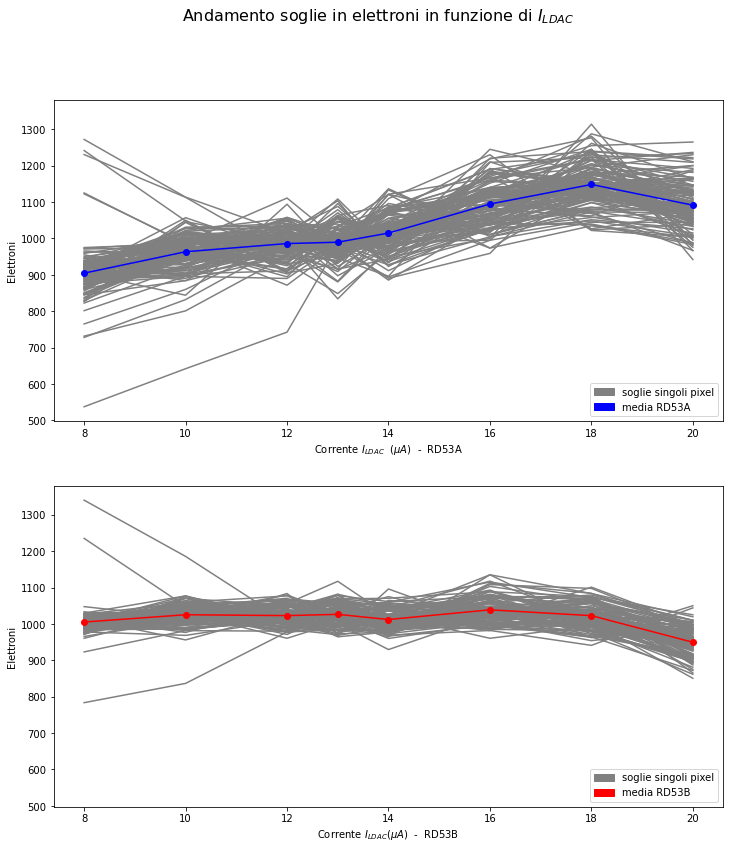

In [32]:
fig, ax = plt.subplots(2, 1, sharey=True, figsize = (12, 13))
fig.suptitle("Andamento soglie in elettroni in funzione di $I_{LDAC}$", fontsize=16)

for i in range(len(deltasA[0])):
    ax[0].plot(correnti, [pt[i] for pt in deltasA], color="grey")
    
for i in range(len(deltasB[0])):
    ax[1].plot(correnti, [pt[i] for pt in deltasB], color="grey")
    
meanA = [np.mean(i) for i in deltasA] #calcolo medie
meanB = [np.mean(i) for i in deltasB]
    
ax[0].plot(correnti, meanA, "-o", color = "blue", label = "media RD53A")
ax[0].set_xlabel("Corrente $I_{LDAC}$  $(\mu A)$  -  RD53A")
ax[0].set_ylabel("Elettroni")

ax[1].plot(correnti, meanB, "-o", color = "red", label = "media RD53B")
ax[1].set_xlabel("Corrente $I_{LDAC}  (\mu A)$  -  RD53B")
ax[1].set_ylabel("Elettroni")

grey_patch = mpatches.Patch(color='grey', label='soglie singoli pixel')
blue_patch = mpatches.Patch(color='blue', label="media RD53A")
red_patch = mpatches.Patch(color='red', label="media RD53B")

ax[0].legend(loc="lower right", handles=[grey_patch, blue_patch])
ax[1].legend(loc="lower right", handles=[grey_patch, red_patch])


plt.show()

## Media delle soglie in funzione di ILDCA per RD53A e RD53B a confronto

In [10]:
meanA = [np.mean(i) for i in deltasA] #calcolo medie
meanB = [np.mean(i) for i in deltasB]

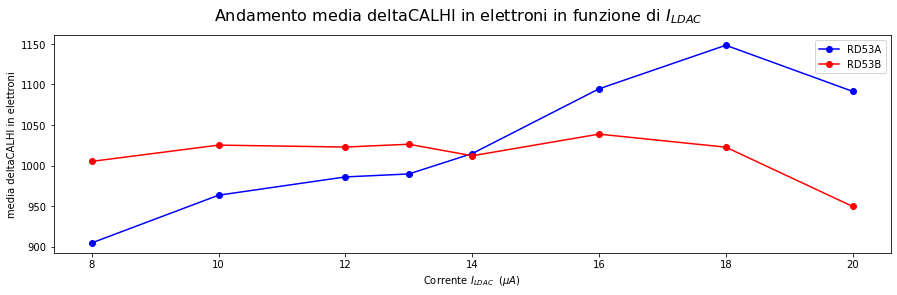

In [33]:
fig, ax = plt.subplots(figsize = (15,4))
ax.plot(correnti, meanA, "-o", color = "blue", label = "RD53A")
ax.plot(correnti, meanB, "-o", color = "red", label = "RD53B")
ax.set_xlabel("Corrente $I_{LDAC}$  $(\mu A)$ ")
ax.set_ylabel("media deltaCALHI in elettroni")
fig.suptitle("Andamento media deltaCALHI in elettroni in funzione di $I_{LDAC}$ ", fontsize=16)
ax.legend(loc="upper right")

plt.show()

## Plot dispersione di soglia in funzione di ILDAC

In [12]:
devA = [np.std(x) for x in deltasA] #calcolo deviazioni standard
devB = [np.std(x) for x in deltasB]

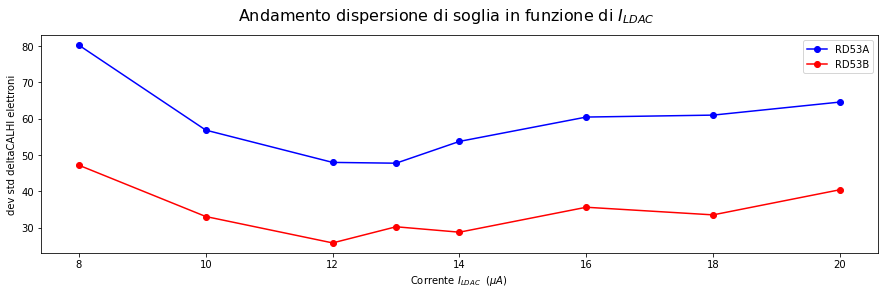

In [34]:
fig, ax = plt.subplots(figsize = (15,4))
ax.plot(correnti, devA, "-o", color = "blue", label = "RD53A")
ax.plot(correnti, devB, "-o", color = "red", label = "RD53B")
ax.set_xlabel("Corrente $I_{LDAC}$  $(\mu A)$ ")
ax.set_ylabel("dev std deltaCALHI elettroni")
fig.suptitle("Andamento dispersione di soglia in funzione di $I_{LDAC}$", fontsize=16)
ax.legend(loc="upper right")


plt.show()

## Plot deviazione standard deltaCALHI che contiene il ~98% dei pixel in funzione di ILDAC
Considero il vettore delle soglie di ogni pixel. Da ognuno di essi rimuovo il valore minimo e il valore massimo registrato. Ciò significa rimuovere due outliers.

In [28]:
print("A: ", len(deltasA[2]), "B: ", len(deltasB[2]))

A:  127 B:  112


Considerando il numero di campioni, rimuovendo due elementi da ciascun vettore otteniamo:

| Modello|Num tot pixel|Pixel rimanenti| ||
|:------------:|:---:|:--:|:-----------------:|:-----:|
| RD53A      |127| 125 | $\frac{125}{127}$ ~ 0.98   | 98% |
| RD53B      |112| 110 |$\frac{110}{112}$ ~ 0.98 | 98% |

In questo modo consideriamo un intervallo di soglie che contiene il 98% dei pixel.

In [16]:
import copy
#devo copiare i dati da un vettore all'altro,
#altrimenti viene solo generato un puntatore e le modifiche vengono effettuate sempre sullo stesso vettore
A = copy.deepcopy(deltasA) #deepcopy agisce anche sulle sottoliste
B = copy.deepcopy(deltasB)

In [17]:
# rimuovo due elementi outliers A: rimangono 125/127 ~ 0.98 elementi | B: rimangono 110/112 ~ 0.98 elementi
def removeOutliers(lst):
    for i in lst:
        i.remove(max(i))
        i.remove(min(i))

In [18]:
removeOutliers(A)
removeOutliers(B)

In [19]:
devA_98 = [np.std(x) for x in A] #calcolo le deviazioni standard 
devB_98 = [np.std(x) for x in B]

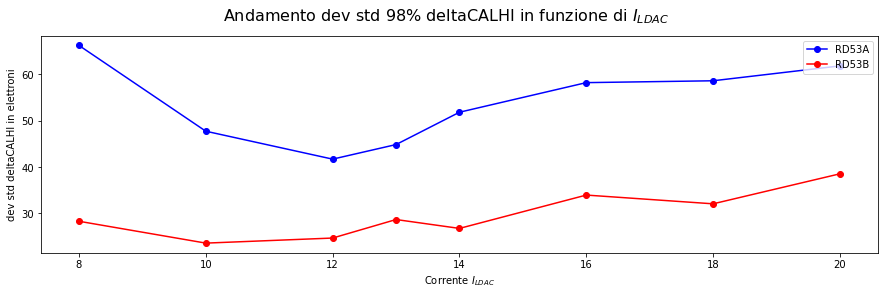

In [35]:
fig, ax = plt.subplots(figsize = (15,4))
ax.plot(correnti, devA_98, "-o", color = "blue", label = "RD53A")
ax.plot(correnti, devB_98, "-o", color = "red", label = "RD53B")
ax.set_xlabel("Corrente $I_{LDAC}$")
ax.set_ylabel("dev std deltaCALHI in elettroni")
fig.suptitle("Andamento dev std 98% deltaCALHI in funzione di $I_{LDAC}$", fontsize=16)
ax.legend(loc="upper right")


plt.show()

## Confronto deltaCALHI e 98%deltaCALHI

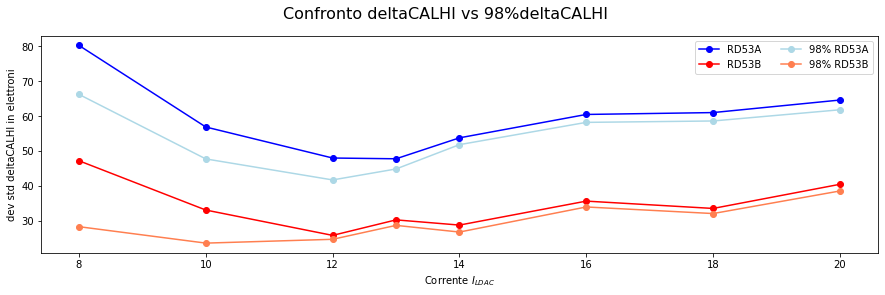

In [36]:
fig, ax = plt.subplots(figsize = (15,4))
ax.plot(correnti, devA, "-o", color = "blue", label = "RD53A")
ax.plot(correnti, devB, "-o", color = "red", label = "RD53B")
ax.plot(correnti, devA_98, "-o", color = "lightblue", label = "98% RD53A")
ax.plot(correnti, devB_98, "-o", color = "coral", label = "98% RD53B")

ax.set_xlabel("Corrente $I_{LDAC}$")
ax.set_ylabel("dev std deltaCALHI in elettroni")
fig.suptitle("Confronto deltaCALHI vs 98%deltaCALHI", fontsize=16)
ax.legend(loc="upper right", ncol=2)
#plt.savefig('confronto dispersione 98% deltaCALHI.png')


plt.show()